<a href="https://colab.research.google.com/github/ggg2929/MagiskOnWSALocal/blob/main/Salinan_dari_TA_GRACE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MERGE DATA CSV**

> Tambahkan blockquote



In [1]:
import pandas as pd

# Daftar file CSV dengan path yang benar
# Ubah path jika file berada di direktori yang berbeda
file_list = [
    '/content/data1.csv',
    '/content/data2.csv',
    '/content/data3.csv',
    '/content/data4.csv'
]

all_data = []

# Membaca dan menggabungkan semua file CSV
for file in file_list:
    try:
        df = pd.read_csv(file)
        all_data.append(df)
        print(f"✅ Berhasil membaca file: {file}")
    except FileNotFoundError:
        print(f"❌ Error: File tidak ditemukan: {file}. Pastikan file ada di lokasi yang benar.")
        # Anda bisa memilih untuk keluar atau melewatkan file ini
        continue # Lanjutkan ke file berikutnya meskipun satu tidak ditemukan
    except Exception as e:
        print(f"❌ Error saat membaca file {file}: {e}")
        continue # Lanjutkan ke file berikutnya

# Gabungkan semua DataFrame jadi satu
# Pastikan all_data tidak kosong sebelum menggabungkan
if all_data:
    merged_data = pd.concat(all_data, ignore_index=True)

    # Simpan ke file CSV baru
    merged_data.to_csv('data_gabungan.csv', index=False)

    print("✅ Berhasil digabung jadi satu file: data_gabungan.csv")
else:
    print("⚠️ Tidak ada data yang berhasil dibaca. File gabungan tidak dibuat.")

✅ Berhasil membaca file: /content/data1.csv
✅ Berhasil membaca file: /content/data2.csv


<ipython-input-1-db1f68ac5384>:17: DtypeWarning: Columns (16,20,21,36,37,38,40,41,42,47,96,100,104,112,115,116,119,124,127,128,132,135,140,143,144,147,159,179,220,223,263,312,315,328,331,386,388,389,401,402,408,419,468,474,492,498,510,516,522,528,534,546,552,558,600,606,624,642,654,660,672,678,690,708,750,756) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


✅ Berhasil membaca file: /content/data3.csv
✅ Berhasil membaca file: /content/data4.csv
✅ Berhasil digabung jadi satu file: data_gabungan.csv


In [2]:
from google.colab import files
files.download('/content/data_gabungan.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **PREPROCESSING DNG NLP**

In [4]:
!pip install sastrawi
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.8 MB/s eta 0:00:00


In [7]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# === Setup Awal ===
nltk.download('stopwords')  # Download stopwords bahasa Indonesia dari NLTK
stop_words = set(stopwords.words('indonesian'))  # Stopwords bahasa Indonesia

# Stemmer (untuk stemming kata dasar)
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Kamus kata tidak baku (normalisasi)
normalisasi_kata = {
    'gk': 'tidak', 'ga': 'tidak', 'nggak': 'tidak', 'bgt': 'banget',
    'bikin': 'membuat', 'ngerti': 'mengerti', 'belom': 'belum', 'tp': 'tapi',
    'yg': 'yang', 'udh': 'sudah', 'dr': 'dari', 'aja': 'saja', 'bljr': 'belajar',
    'sm': 'sama', 'makasih': 'terima kasih', 'dpt': 'dapat', 'klo': 'kalau'
}

# === Fungsi Normalisasi ===
def normalize_text(text):
    """Normalisasi kata tidak baku seperti 'gk' menjadi 'tidak'."""
    tokens = text.split()
    tokens = [normalisasi_kata.get(word, word) for word in tokens]
    return ' '.join(tokens)

# === Fungsi Preprocessing Lengkap ===
def preprocess_text(text):
    """Fungsi untuk preprocessing lengkap: normalisasi, hapus angka, hapus tanda baca, stopwords, dan stemming."""
    text = str(text).lower()  # Mengubah ke huruf kecil
    text = re.sub(r'\d+', '', text)  # Menghapus angka
    text = text.translate(str.maketrans('', '', string.punctuation))  # Menghapus tanda baca
    text = normalize_text(text)  # Normalisasi kata tidak baku
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  # Menghapus stopword
    text = ' '.join(tokens)  # Menggabungkan kembali token menjadi kalimat
    return stemmer.stem(text)  # Stemming untuk mengembalikan ke bentuk dasar

# === BACA DATA KOMENTAR ===
df = pd.read_csv('/content/data_gabungan.csv')  # Membaca data dari file
df['preprocessed'] = df['comment_text'].apply(preprocess_text)  # Terapkan preprocessing

# === SIMPAN HASIL ===
df.to_csv('preprocessing.csv', index=False)  # Simpan data yang sudah diproses
print("✅ File dengan preprocessing NLP lengkap disimpan sebagai 'komentar_prenlp_lengkap.csv'")

# Tampilkan contoh hasil preprocessing
print(df[['comment_text', 'preprocessed']].head(10))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-7-02cd4d5e83e4>:44: DtypeWarning: Columns (1,3,5,6,7,12,14,15,16,17,20,21,24,27,28,31,32,35,37,38,39,42,43,44,45,46,50,52,53,54,57,58,59,60,62,63,65,66,67,68,69,70,71,72,73,82,83,84,85,86,88,89,90,95,97,98,99,101,102,103,105,106,107,109,110,111,114,116,118,119,120,122,123,124,126,127,128,130,131,132,134,135,136,138,139,140,142,143,144,146,147,148,150,151,152,154,155,156,158,159,160,162,163,164,166,167,168,170,171,172,174,175,176,178,179,180,182,183,184,186,187,188,190,191,192,194,195,196,198,199,200,202,203,206,208,210,211,212,214,215,216,218,219,222,226,227,230,234,238,242,246,247,250,254,258,262,266,270,274,278,282,286,288,290,291,294,298,302,306,310,314,318,322,326,330,331,334,338,342,346,350,354,358,362,366,370,374,378,380,382,383,386,390,394,396,398,399,402,406,410,414,418,422,426,430,434,438,442,446,450,452,453,454,455,456,457,458,459,460,464,465,4

✅ File dengan preprocessing NLP lengkap disimpan sebagai 'komentar_prenlp_lengkap.csv'
  comment_text preprocessed
0          NaN          nan
1          NaN          nan
2          NaN          nan
3          NaN          nan
4          NaN          nan
5          NaN          nan
6          NaN          nan
7          NaN          nan
8          NaN          nan
9          NaN          nan


## **LABEL**

In [9]:
import pandas as pd

# Load file hasil crawling
df = pd.read_csv('preprocessing.csv')

# Daftar kata kunci yang mengindikasikan komentar tentang konsentrasi
keywords = [
    'fokus', 'konsentrasi', 'terganggu', 'gangguan', 'distraksi',
    'ngerti', 'paham', 'bingung', 'susah ngerti', 'ga ngerti',
    'gak fokus', 'nggak fokus', 'bikin ngerti', 'membantu belajar',
    'belajar pemrograman', 'ngoding','desain','desain poster','poster',
    'belajar kalkulus','kuliah kalkulus', 'kalkulus','algoritma', 'belajar algoritma',
    'coding','uiux','materi kuliah', 'visual studio','susah konsen','struktur data',
]

# Fungsi deteksi kata kunci
def check_concentration(comment):
    comment = str(comment).lower()
    for kw in keywords:
        if kw in comment:
            return 1
    return 0

# Terapkan labeling otomatis
df['konsentrasi'] = df['comment_text'].apply(check_concentration)

# Tambahkan kolom keterangan
df['keterangan'] = df['konsentrasi'].apply(lambda x: 'Komentar terkait konsentrasi' if x == 1 else 'Tidak terkait')

# Urutkan supaya komentar yang berkaitan muncul di atas
df_sorted = df.sort_values(by='konsentrasi', ascending=False)

# Pilih dan atur ulang kolom
final_columns = ['video_id', 'commenter_name', 'comment_text', 'published_at', 'like_count', 'konsentrasi', 'keterangan']
df_final = df_sorted[final_columns]

# Simpan hasilnya
df_final.to_csv('labeling.csv', index=False, encoding='utf-8')

# Tampilkan 10 baris pertama sebagai preview
print("=== Contoh Hasil Labeling Otomatis (Rapi) ===")
print(df_final.head(10))
print("\n✅ Hasil disimpan sebagai 'labeling_otomatis_rapi.csv'")

<ipython-input-9-7df2464ddc5f>:4: DtypeWarning: Columns (1,3,5,6,7,12,14,15,16,17,20,21,24,27,28,31,32,35,37,38,39,42,43,44,45,46,50,52,53,54,57,58,59,60,62,63,65,66,67,68,69,70,71,72,73,82,83,84,85,86,88,89,90,95,97,98,99,101,102,103,105,106,107,109,110,111,114,116,118,119,120,122,123,124,126,127,128,130,131,132,134,135,136,138,139,140,142,143,144,146,147,148,150,151,152,154,155,156,158,159,160,162,163,164,166,167,168,170,171,172,174,175,176,178,179,180,182,183,184,186,187,188,190,191,192,194,195,196,198,199,200,202,203,206,208,210,211,212,214,215,216,218,219,222,226,227,230,234,238,242,246,247,250,254,258,262,266,270,274,278,282,286,288,290,291,294,298,302,306,310,314,318,322,326,330,331,334,338,342,346,350,354,358,362,366,370,374,378,380,382,383,386,390,394,396,398,399,402,406,410,414,418,422,426,430,434,438,442,446,450,452,453,454,455,456,457,458,459,460,464,465,466,467,468,469,470,471,472,474,475,476,477,479,481,483,484,485,486,487,489,491,492,493,494,495,496,497,498,499,500,501,5

=== Contoh Hasil Labeling Otomatis (Rapi) ===
         video_id             commenter_name  \
3280  qmNrg6fEyEw                   @yan2410   
6906  L1WaVEi7ePI             @jihadabie8196   
4207  MCVkMmYL-aY        @ernierofficial8799   
3278  qmNrg6fEyEw       @ahmadashar-tutorial   
5827  60K7zxIjHQo        @hafizhahrahmah4130   
4211  MCVkMmYL-aY              @mbaknisa8940   
4214  MCVkMmYL-aY             @nankdieto6587   
4215  MCVkMmYL-aY                  @lani2233   
5154  -HyqafzN8ic  @aryagalangjanursatria318   
5153  -HyqafzN8ic            @abdulfitra3771   

                                           comment_text          published_at  \
3280  Mantap, selalu mudah dimengerti .\nBahas Webas...  2022-11-17T15:52:37Z   
6906  Hampir tiap hari mantengin youtubenya, tp ngk ...  2023-06-09T10:31:52Z   
4207  Aku tutor yang lain gapaham" tpi klo pak dika ...  2024-09-13T04:47:11Z   
3278  Mantap.... Penjelasan simpel dan mudah dipahami 👍  2022-11-18T01:24:09Z   
5827  kak, bisa mint

# **SEIMBANGKAN DATA**

In [10]:
# Install jika belum
!pip install imbalanced-learn

import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# 1. Baca file hasil labeling
data = pd.read_csv('labeling.csv')

# 2. Pilih fitur (komentar) dan label (konsentrasi)
X = data[['comment_text']]  # Fitur: isi komentar
y = data['konsentrasi']     # Label: 1 = konsentrasi, 0 = tidak konsentrasi

# 3. Tambahkan dummy index untuk melacak teks asli
X['dummy_index'] = X.index

# 4. Lakukan oversampling untuk seimbangkan jumlah data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# 5. Ambil kembali kolom komentar asli berdasarkan index
balanced_data = pd.DataFrame({
    'comment_text': data.loc[X_resampled['dummy_index'], 'comment_text'].values,
    'konsentrasi': y_resampled
})

# 6. Simpan data seimbang ke file baru
balanced_data.to_csv('data_seimbang_labeling.csv', index=False)

# 7. Tampilkan ringkasan hasil
print("✅ Data berhasil diseimbangkan dan disimpan sebagai 'data_seimbang_labeling.csv'")
print("\n📊 Distribusi label setelah penyeimbangan:")
print(balanced_data['konsentrasi'].value_counts())


✅ Data berhasil diseimbangkan dan disimpan sebagai 'data_seimbang_labeling.csv'

📊 Distribusi label setelah penyeimbangan:
konsentrasi
1    6931
0    6931
Name: count, dtype: int64


<ipython-input-10-ca83fd2d01c7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['dummy_index'] = X.index


In [11]:
import csv

filename = 'data_seimbang_labeling.csv'  # ganti dengan nama file CSV kamu

with open(filename, mode='r', newline='') as file:
    reader = csv.reader(file)
    next(reader)  # skip header, hapus baris ini kalau CSV kamu gak ada header
    row_count = sum(1 for row in reader)

print(f"Jumlah data dalam CSV: {row_count}")


Jumlah data dalam CSV: 13862


In [12]:
df['konsentrasi'].value_counts()


,count
konsentrasi,
0,6931
1,538


# **PELATIHAN MODEL**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 15s 56ms/step - accuracy: 0.7770 - loss: 0.4154 - val_accuracy: 0.9977 - val_loss: 0.0098
Epoch 2/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.9985 - loss: 0.0078 - val_accuracy: 0.9988 - val_loss: 0.0023
Epoch 3/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 0.9988 - val_loss: 0.0018
Epoch 4/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 1.0000 - loss: 4.5690e-04 - val_accuracy: 1.0000 - val_loss: 4.5166e-04
Epoch 5/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 1.0000 - loss: 1.4156e-04 - val_accuracy: 1.0000 - val_loss: 6.8981e-04
Epoch 6/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 1.0000 - loss: 1.0242e-04 - val_accuracy: 1.0000 - val_loss: 5.1280e-04
Epoch 7/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - accuracy: 1.0000 - loss: 5.3553e-05 - val_accuracy: 1.0000 - val_loss: 2.3832e-04
Epoch 8/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - ac

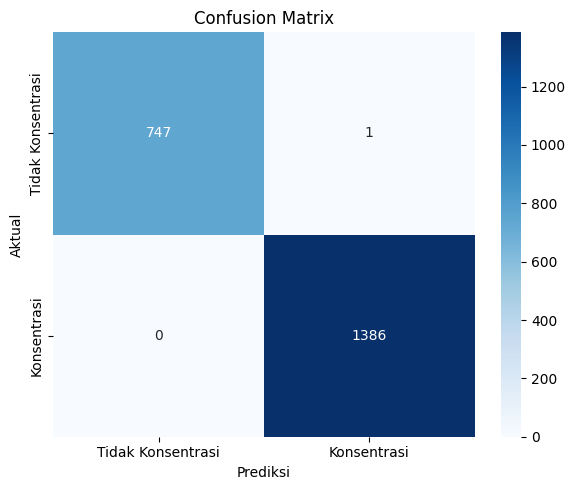

In [16]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load data
df = pd.read_csv('/content/data_seimbang_labeling.csv')
df = df.dropna(subset=['comment_text', 'konsentrasi'])

# 2. Label dan data teks
texts = df['comment_text'].values
labels = df['konsentrasi'].values

# 3. Tokenisasi teks
max_words = 10000  # jumlah maksimal kata
max_len = 100      # panjang sequence (bisa disesuaikan)

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=max_len)

# 4. Label untuk binary classification (0 dan 1)
y = labels

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Bangun model CNN
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # output 1 node dengan sigmoid untuk binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

# 7. Latih model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    class_weight={0: 1, 1: 1}  # Bisa diatur sesuai kebutuhan
)

# 8. Evaluasi
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['Tidak Konsentrasi', 'Konsentrasi']))

print("\n✅ Akurasi:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")

cm = confusion_matrix(y_test, y_pred)
labels = ['Tidak Konsentrasi', 'Konsentrasi']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
